In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import model_selection, datasets
import joblib
import pickle
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import itertools

In [2]:
df = pd.read_csv("./brain_train.csv")
test_df = pd.read_csv("./brain_test.csv")
df.head()

,path,diagnose
0,./Brain scans\Tumor\TRAIN\y0.jpg,tumor
1,./Brain scans\Tumor\TRAIN\y1.jpg,tumor
2,./Brain scans\Tumor\TRAIN\y10.jpg,tumor
3,./Brain scans\Tumor\TRAIN\y100.jpg,tumor
4,./Brain scans\Tumor\TRAIN\y101.jpg,tumor


In [3]:
y_train = df['diagnose']
y_test = test_df['diagnose']

In [4]:
x_train = []
x_test = []
for path in df["path"]:
    x_train.append(cv2.resize(cv2.imread(path), (500,500)))
for path in test_df["path"]:
    x_test.append(cv2.resize(cv2.imread(path), (500,500)))

In [5]:
x_train = pd.Series(x_train)
x_test = pd.Series(x_test)

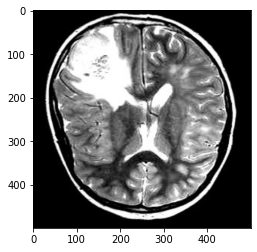

In [6]:
plt.imshow(x_train[0])

In [7]:
def Feature_extractor(image):
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(32, 32),cells_per_block=(2, 2), visualize=True, multichannel=True)
    return fd, hog_image

In [8]:
type(x_train[0][0][0][0])

numpy.uint8

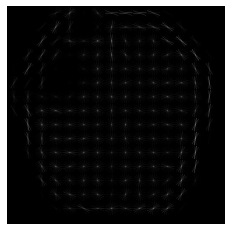

In [9]:
plt.axis("off")
fd, hog_image = Feature_extractor(x_train[1])
plt.imshow(hog_image, cmap="gray")

In [10]:
fd.size

7056

In [11]:
fd[1200:1210]

array([0.22106788, 0.22106788, 0.22106788, 0.22106788, 0.22106788,
       0.16330953, 0.16795037, 0.11850308, 0.14451001, 0.16389331])

In [13]:
hog_features = np.array(hog_features)

In [14]:
hog_features.shape

(1001, 7056)

In [15]:
new_df = pd.DataFrame(data = hog_features)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7046,7047,7048,7049,7050,7051,7052,7053,7054,7055
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00595,0.035258,0.005303,0.004879,0.012916,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [16]:
new_df['label'] = df['diagnose']
new_df = shuffle(new_df)

In [17]:
X_Train = new_df.loc[:, new_df.columns != 'label']
Y_Train = new_df['label']

In [178]:
# rst = RandomForestClassifier(n_estimators = 72, max_features = 10)
# rst.fit(X_Train, Y_Train)
# rst.score(X_Train,Y_Train)

1.0

In [179]:
# rst_y_pred = rst.predict(X_Test)
# accuracy_score(rst_y_pred,Y_Test)

0.925

In [183]:
# score = 0.0
# while score < 0.93:
#     rst = RandomForestClassifier(n_estimators = 72, max_features = 10)
#     rst.fit(X_Train, Y_Train)
#     #rst.score(X_Train,Y_Train)
#     rst_y_pred = rst.predict(X_Test)
#     score = accuracy_score(rst_y_pred,Y_Test)
# score

0.935

In [18]:
test_hog_features = []
test_hog_images = []
for image in x_test:
    fd, hog_image = Feature_extractor(image)
    test_hog_features.append(fd)
    test_hog_images.append(hog_image)

In [19]:
new_test_df = pd.DataFrame(data = test_hog_features)
new_test_df['label'] = test_df['diagnose']
new_test_df = shuffle(new_test_df)
X_Test = new_test_df.loc[:, new_test_df.columns != 'label']
Y_Test = new_test_df['label']

In [105]:
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 160, num = 30)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [2,4]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

In [106]:
# param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [107]:
# rndfrst = RandomForestClassifier()

In [108]:
# rf_Grid = GridSearchCV(estimator = rndfrst, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [109]:
# rf_Grid.fit(X_Train, Y_Train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 15, 20, 25, 30, 35, 41, 46, 51,
                                          56, 61, 66, 72, 77, 82, 87, 92, 97,
                                          103, 108, 113, 118, 123, 128, 134,
                                          139, 144, 149, 154, 160]},
             verbose=2)

In [110]:
# rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 72}

In [111]:
# rf_Grid.score(X_Train, Y_Train)

0.939060939060939

In [112]:
# rf_Grid.score(X_Test, Y_Test)

0.89

In [20]:
ada = AdaBoostClassifier()
ada.fit(X_Train, Y_Train)
ada.score(X_Train, Y_Train)

1.0

In [21]:
ada_y_pred = ada.predict(X_Test)
accuracy_score(ada_y_pred,Y_Test)

0.965

In [26]:
filename = "HoGwithAdaboost.joblib"
joblib.dump(ada, filename)

['HoGwithAdaboost.joblib']

In [197]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_Train, Y_Train)
clf.score(X_Train,Y_Train)

1.0

In [198]:
clf_y_pred = clf.predict(X_Test)
accuracy_score(clf_y_pred,Y_Test)

0.825

In [199]:
gbt = GradientBoostingClassifier(learning_rate = 0.3,n_estimators = 180)
gbt.fit(X_Train, Y_Train)
gbt.score(X_Train,Y_Train)

1.0

In [200]:
gbt_y_pred = gbt.predict(X_Test)
accuracy_score(gbt_y_pred,Y_Test)

0.965

In [205]:
# filename = "HoGwithGradientBoosting.joblib"
# joblib.dump(gbt, filename)

['HoGwithGradientBoosting.joblib']

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
ann = MLPClassifier(solver='lbfgs', alpha=1e-8, hidden_layer_sizes=(10,5), random_state=10,warm_start=True)

In [24]:
ann.fit(X_Train, Y_Train)
ann.score(X_Train,Y_Train)

1.0

In [25]:
ann_y_pred = ann.predict(X_Test)
accuracy_score(ann_y_pred,Y_Test)

0.95